In [1]:
import apafib
import numpy as np
import pandas as pd

from sklearn.metrics import  ConfusionMatrixDisplay,classification_report,\
                             RocCurveDisplay, PrecisionRecallDisplay,\
                             accuracy_score, f1_score, precision_score, recall_score

from sklearn.decomposition import PCA

from sklearn.svm import LinearSVC, SVC
from sklearn.svm import LinearSVR, SVR

from IPython.display import display, HTML #core.display deprecated
show_html = lambda html: display(HTML(html))

from yellowbrick.classifier.rocauc import roc_auc

from skopt import BayesSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/mac/Library/Python/3.10/lib/python/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from apafib import load_MNIST

X_train, X_test, y_train, y_test = apafib.load_MNIST()

#X_train, X_test, y_train, y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = pd.DataFrame(X_train, columns = np.arange(X_train.shape[1]))
X_test  = pd.DataFrame(X_test, columns = np.arange(X_test.shape[1]))

#me guardo una copia del dataset de entrenamiento y test ya que mostraré los dígitos escritos a mano a partir 
#del dataset y aplicaré transformaciones que modificaran ambos conjuntos
X_train_copia = X_train
X_test_copia = X_test

data_columns = X_train_copia.columns
data_columns = data_columns.values
#print(data_columns)

clases = [str(v) for v in sorted(np.unique(y_train))]
clases

(4514, 784) (755, 784) (4514,) (755,)


['4', '7', '9']

SVM con kernel lineal 

In [3]:
param = {'C':10**np.linspace(-4,4,101)}

lsvc =  SVC(kernel='linear', max_iter=2500000, random_state=0)
lsvc_gs = BayesSearchCV(lsvc,param,n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=0)
lsvc_gs.fit(X_train_copia, y_train);

In [4]:
show_html(pd.DataFrame(lsvc_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
9,{'C': 0.09120108393559097},0.949713,1
10,{'C': 0.052480746024977286},0.949269,2
1,{'C': 0.012022644346174132},0.945725,3
4,{'C': 0.006918309709189363},0.943510,4
7,{'C': 1.2022644346174132},0.941076,5


In [5]:
print(classification_report(lsvc_gs.predict(X_test), y_test,target_names=clases))

              precision    recall  f1-score   support

           4       0.97      0.95      0.96       254
           7       0.95      0.95      0.95       251
           9       0.92      0.94      0.93       250

    accuracy                           0.95       755
   macro avg       0.95      0.95      0.95       755
weighted avg       0.95      0.95      0.95       755



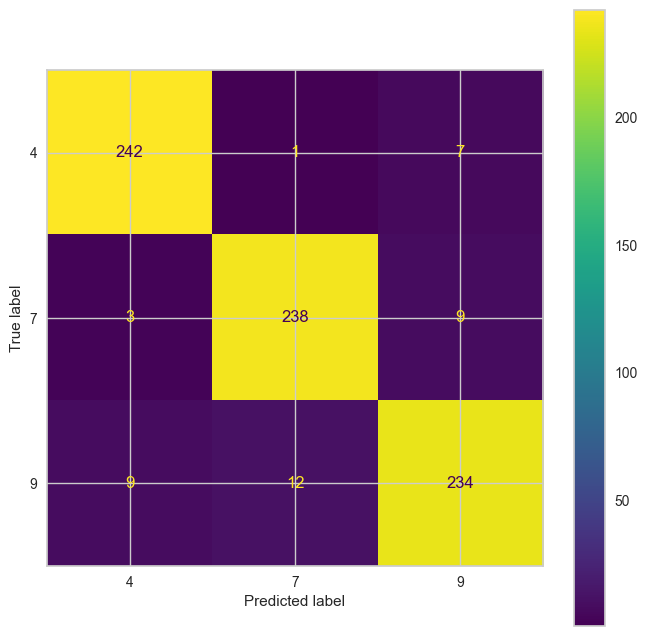

In [6]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(lsvc_gs, X_test, y_test, display_labels=clases, ax=plt.subplot());

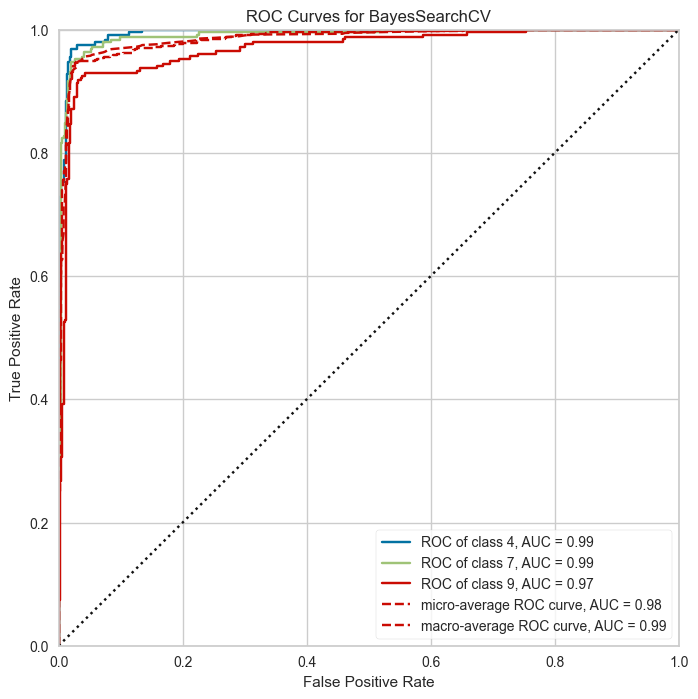

In [7]:
plt.figure(figsize=(8,8));
roc_auc(lsvc_gs, X_train_copia, y_train, X_test, y_test);

SVM con kernel polinómico no-lineal 

In [8]:
param = {'C':10**np.linspace(-4,4,101), 'degree':[2,3]}

psvc =  SVC(kernel='poly', max_iter=25000, random_state=0)
psvc_gs = BayesSearchCV(psvc,param,n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=0)
psvc_gs.fit(X_train_copia, y_train);

In [9]:
show_html(pd.DataFrame(psvc_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
12,"{'C': 9.120108393559097, 'degree': 2}",0.979841,1
10,"{'C': 39.81071705534978, 'degree': 2}",0.979398,2
13,"{'C': 144.5439770745928, 'degree': 2}",0.979398,2
5,"{'C': 524.8074602497722, 'degree': 3}",0.977404,4
6,"{'C': 5754.399373371566, 'degree': 3}",0.977404,4


In [10]:
print(classification_report(psvc_gs.predict(X_test), y_test,target_names=clases))

              precision    recall  f1-score   support

           4       0.97      0.97      0.97       250
           7       0.98      0.99      0.99       249
           9       0.96      0.96      0.96       256

    accuracy                           0.97       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.97      0.97      0.97       755



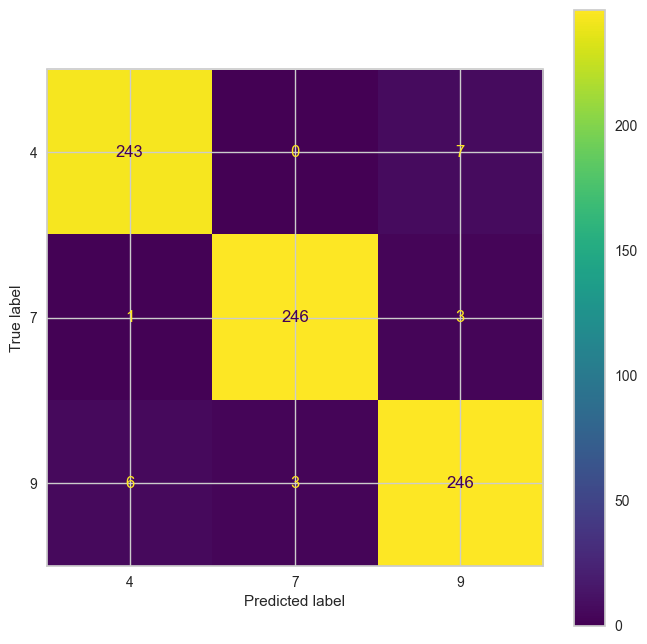

In [11]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(psvc_gs, X_test, y_test, display_labels=clases, ax=plt.subplot());

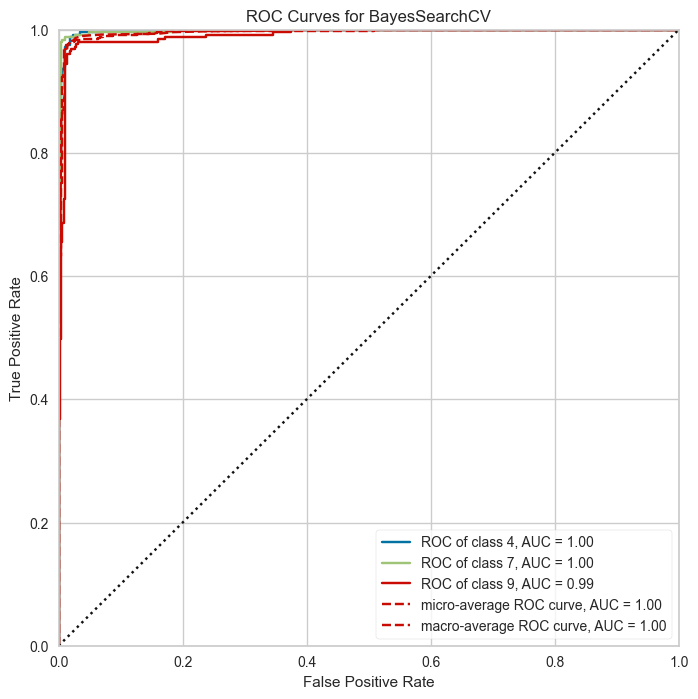

In [12]:
plt.figure(figsize=(8,8));
roc_auc(psvc_gs, X_train, y_train, X_test, y_test);

SVM con kernel rbf no-lineal 

In [13]:
param = {'C':10**np.linspace(-4,4,101), 'gamma':['scale','auto']}

rbsvc =  SVC(kernel='rbf', max_iter=25000, random_state=0)
rbsvc_gs = BayesSearchCV(rbsvc,param,n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=0)
rbsvc_gs.fit(X_train_copia, y_train);

In [14]:
show_html(pd.DataFrame(rbsvc_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
5,"{'C': 524.8074602497722, 'gamma': 'scale'}",0.982055,1
6,"{'C': 5754.399373371566, 'gamma': 'scale'}",0.982055,1
12,"{'C': 13.182567385564074, 'gamma': 'scale'}",0.982055,1
0,"{'C': 1.7378008287493762, 'gamma': 'scale'}",0.978511,4
7,"{'C': 1.2022644346174132, 'gamma': 'scale'}",0.976739,5


In [15]:
print(classification_report(rbsvc_gs.predict(X_test), y_test,target_names=clases))

              precision    recall  f1-score   support

           4       0.97      0.97      0.97       249
           7       0.98      0.99      0.99       249
           9       0.96      0.96      0.96       257

    accuracy                           0.97       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.97      0.97      0.97       755



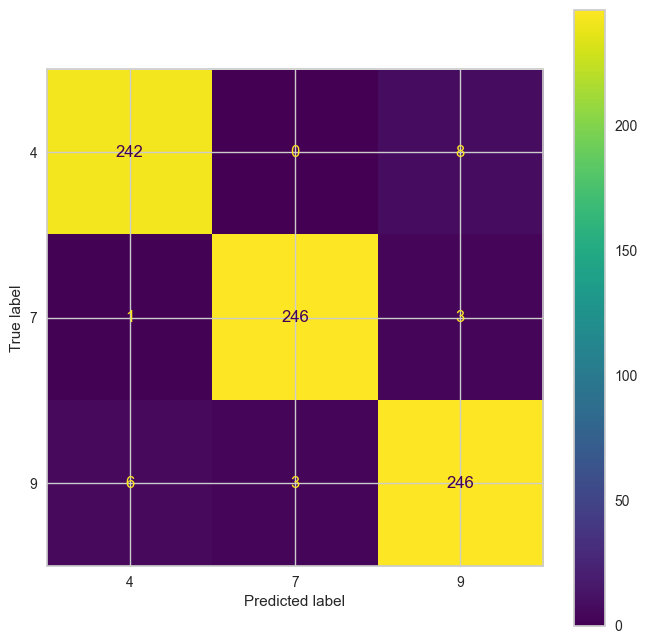

In [16]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(rbsvc_gs, X_test, y_test, display_labels=clases, ax=plt.subplot());

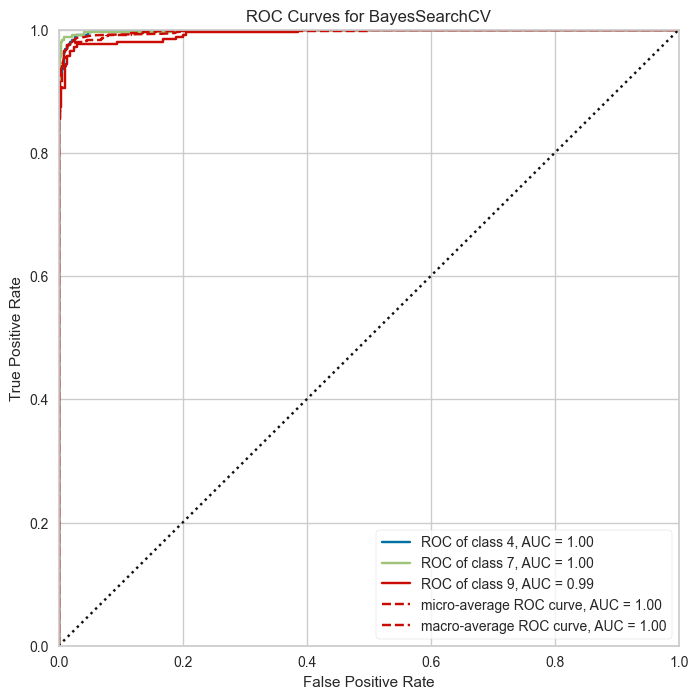

In [17]:
plt.figure(figsize=(8,8));
roc_auc(rbsvc_gs, X_train, y_train, X_test, y_test);